<a href="https://colab.research.google.com/github/amit-kr-phe/Team-Capstone-Project-1-on-EDA/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Play Store App Dataset Exploratory Data Analysis**


## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**We Are Going To Answer These Questions** 


1.   What are the top 5 apps on the basis of installs?
2.   What is the top 5 expensive apps?
3.   What is the top 5 reviewed apps?
4.   What are the top 5 most installed apps in game category?
5.   Which 5 apps from the family category are having the lowest rating?




#**Exploring and Analyzing the Play Store App Data**

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib



In [2]:
# code to remove warning at top of the plot
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
# mount the drive where files is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/1- Exploratory Data Analysis/5- Play Store App Review Analysis/'

In [5]:
# df_1 is play store data

df_1=pd.read_csv(path+'Play_Store_Data.csv')

# review_df is user review data
review_df=pd.read_csv(path+'User_Reviews.csv')

In [6]:
# Checking first 10 data entries
df_1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
# Checking last 5 data entries
df_1.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df_1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

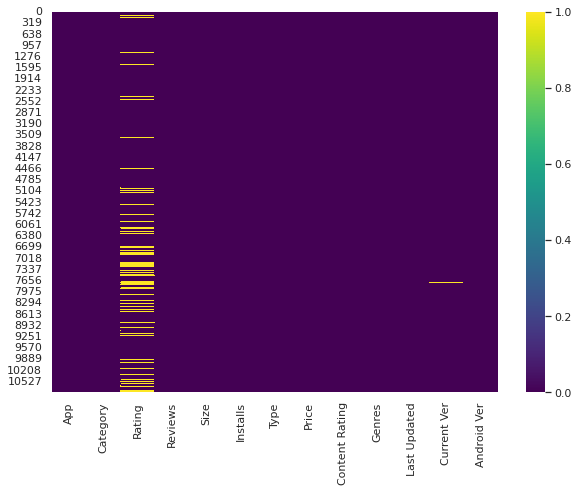

In [10]:
# Heat map for null values
plt.figure(figsize=(10,7))
sns.heatmap(df_1.isnull(),cbar=True, cmap='viridis');

**Observation:** "Rating" column has lots of nan values.

#**Data Cleaning For Play Store Data**

## Find the Duplicate Rows and drop them. 

In [11]:
# Number of duplicated rows.
df_1.duplicated().sum()


483

In [12]:
df_1.drop_duplicates(inplace=True)
df_1.duplicated().sum()

0

##Data Cleaning of 'Rating' Column.

In [13]:
df_1['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [14]:
# Now, we need to replace outlier 19. and nan with average ratings.
df_1['Rating'].replace(np.nan, round(df_1['Rating'].mean(),1),inplace=True)
df_1['Rating'].replace(19.,round(df_1['Rating'].mean(),1),inplace=True)

##Data Cleaning of 'Reviews' Column.

In [15]:
# reviews data contains some values in  Million format such as 200M,100M,etc so we need to convert it in numeric by using ( 1M =1000000)
df_1['Reviews']=pd.to_numeric(df_1['Reviews'],errors='coerce')

##Data Cleaning of 'Size' Column.

In [16]:
df_1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
# '1,000+' is a value in one row of column 'Size', remove this row from df_1

x=df_1[df_1['Size']=='1,000+'].index
df_1.drop(axis=0, inplace=True, index=x)

In [18]:
# replace 'Varies with device' value with 0.0 , we will replace these values with mean value.
# create list of all values of column 'Size'
# clean_size_data() is a user define function, it will convert all values (like-'M','k') in one unit 'M'


df_1['Size']=df_1['Size'].replace('Varies with device',0.0)

df_1['Size']=df_1['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else str(x))
df_1['Size']=df_1['Size'].apply(lambda x: str(x).replace('k','') if 'k' in str(x) else str(x))
df_1['Size']=df_1['Size'].apply(lambda x: float(x))


In [19]:
# Replacing the 0.0 value with mean values
df_1['Size']=df_1['Size'].replace(0.0,df_1['Size'].mean())

##Data Cleaning of 'Installs' Column.

In [20]:
df_1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df_1['Installs']=df_1['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_1['Installs']=df_1['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_1['Installs']=df_1['Installs'].apply(lambda x: float(x))

##Data Cleaning of 'Type', 'Current Ver' and 'Android Ver' Column.

In [22]:
# mode of categorical values
print(df_1['Type'].mode())
print(df_1['Current Ver'].mode())
print(df_1['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [23]:
# Fill the missing categorical values with modes

df_1['Type'].fillna(str(df_1['Type'].mode().values[0]),inplace=True)
df_1['Current Ver'].fillna(str(df_1['Current Ver'].mode().values[0]),inplace=True)
df_1['Android Ver'].fillna(str(df_1['Android Ver'].mode().values[0]),inplace=True)

##Data Cleaning of 'Price' Column.

In [24]:
df_1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
df_1['Price']=df_1['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
df_1['Price']=df_1['Price'].apply(lambda x: float(x))

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10357 non-null  object 
 12  Android Ver     10357 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


In [27]:
df_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#**Data Cleaning For User Reviews Data**

In [28]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [29]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [30]:
# 26863 rows of all column have nan values, so drop all these rows which having nan values
review_df=review_df.dropna(how='all')

In [31]:
review_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [32]:
# some column can have nan values, 
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [33]:
review_df=review_df.dropna(subset=['Translated_Review']).reset_index()
review_df.drop(axis=1,labels='index',inplace=True)

In [34]:
# now drop the duplicate rows if any
review_df=review_df.drop_duplicates()

In [35]:
review_df=review_df.reset_index()
review_df.drop(axis=1,labels='index',inplace=True)

In [36]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


# Joined Dataset('df_1' + 'review_df')   
##Inner Join



In [37]:
combined_df=pd.merge(df_1,review_df, how='inner', on=['App'])

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40414 entries, 0 to 40413
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40414 non-null  object 
 1   Category                40414 non-null  object 
 2   Rating                  40414 non-null  float64
 3   Reviews                 40414 non-null  float64
 4   Size                    40414 non-null  float64
 5   Installs                40414 non-null  float64
 6   Type                    40414 non-null  object 
 7   Price                   40414 non-null  float64
 8   Content Rating          40414 non-null  object 
 9   Genres                  40414 non-null  object 
 10  Last Updated            40414 non-null  object 
 11  Current Ver             40414 non-null  object 
 12  Android Ver             40414 non-null  object 
 13  Translated_Review       40414 non-null  object 
 14  Sentiment               40414 non-null

In [39]:
combined_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love enjoyable fun,Positive,0.433333,0.466667


#**Insight And Visualizations**

## Heat Map

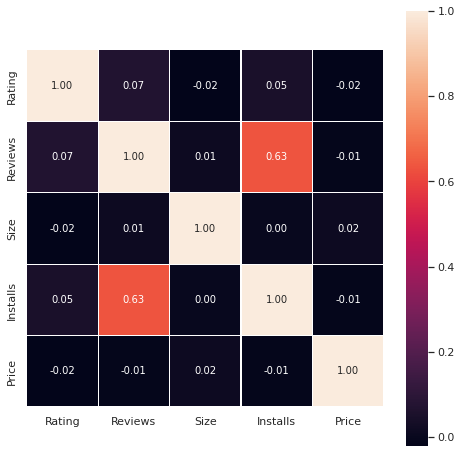

In [40]:
fig, axes=plt.subplots(figsize=(8,8))
sns.heatmap(df_1.corr(),ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show();

**Observation:** This heatmap shows correlations between **Rating**, **Reviews**, **Size**, **Installs** and **Price** columns.

*   Reviews and installs columns are 63% positively correlated.



## Pie Chart

In [41]:
group_name=df_1['Content Rating'].value_counts().index
group_val=df_1['Content Rating'].value_counts().values

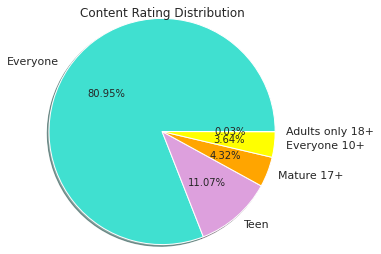

In [42]:
plt.pie(group_val[:5],labels=group_name[:5],autopct='%1.2f%%',shadow=True,colors=['turquoise','plum','orange','yellow','red'],radius=1.3);
plt.title('Content Rating Distribution');

**Observation:** In the Play store App record, maximum content rating are from Everyone after that Teen and Mature 17+

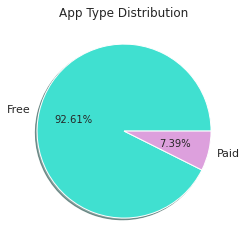

In [43]:
y=df_1['Type'].value_counts()
plt.pie(y,labels=['Free','Paid'],autopct='%1.2f%%',shadow=True,colors=['turquoise','plum'])
plt.title('App Type Distribution');

**Observation:** 92.62% apps in the Play Store are Free Apps.

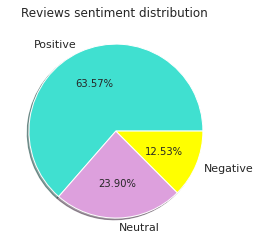

In [44]:
y=combined_df['Sentiment'].value_counts()
plt.pie(y,labels=['Positive','Neutral','Negative'],autopct='%1.2f%%',shadow=True,colors=['turquoise','plum','yellow'])
plt.title('Reviews sentiment distribution ');

**Observation**: The above pie chart shows that 63.57 % reviews is positive and 23.90% reviews is neutral and 12.53% reviews is negative.

## Bar Plot

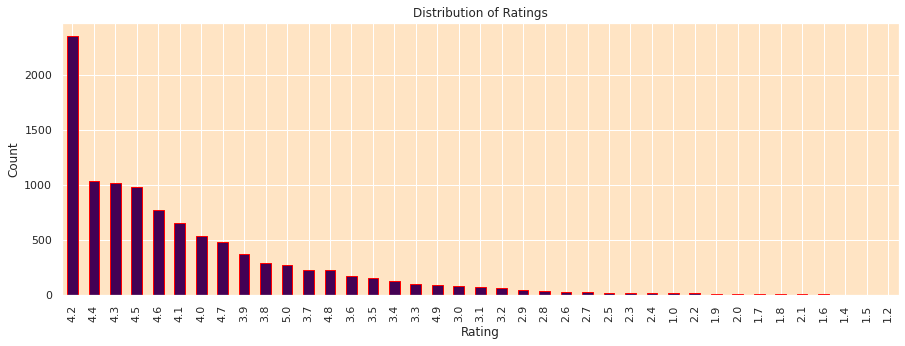

In [57]:
df_1['Rating'].value_counts().plot(kind="bar",figsize=(15,5),edgecolor='red',colormap='viridis')
ax=plt.axes()
ax.set_facecolor('bisque')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show();

**Observation:** 

*   Most of the apps have ratings in the range of  3.8 to 4.8
*   4.2 rating is given by more than 2500 people.




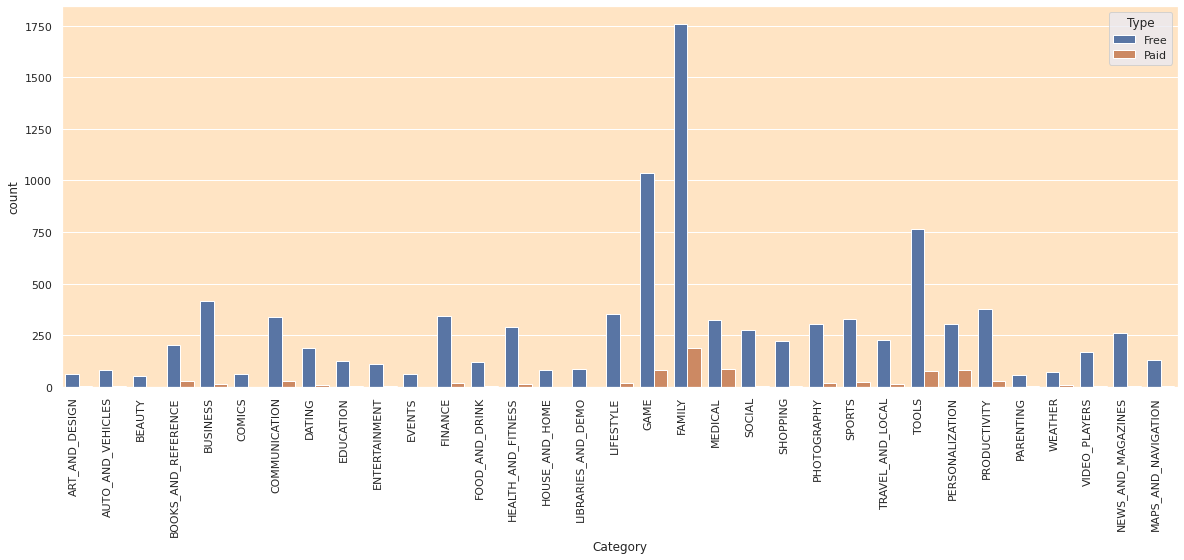

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(x='Category',hue='Type',data=df_1)
ax=plt.axes()
ax.set_facecolor('bisque')
plt.xticks(rotation=90,horizontalalignment='right');

**Observation**: The above graph shows that most of the free and paid apps are from the family and game category.

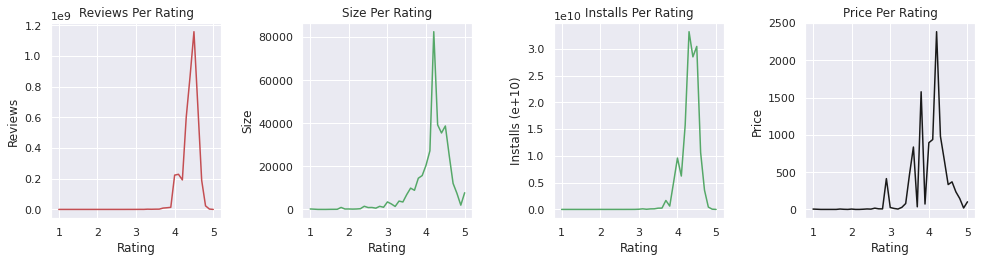

In [59]:
# plot the graphs of reviews, size, installs and price per rating
combine_plot = df_1.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(combine_plot['Rating'], combine_plot['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')



axes[1].plot(combine_plot['Rating'], combine_plot['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')


axes[2].plot(combine_plot['Rating'], combine_plot['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')


axes[3].plot(combine_plot['Rating'], combine_plot['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')


plt.tight_layout(pad=2)
plt.show()


**Observation**: Most of the apps with higher rating range of 3.8-4.7 are having high amount of reviews,size and installs.
In terms of price, It does not reflect direct relationship with rating.